In [167]:
import sys
sys.path.append('..//utils')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import MiguelTK as mtk
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

In [110]:
df = pd.read_excel('data/ab_testing_email.xlsx')
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a10000029,2018-01-19 08:58:03,Facebook,control,False,German,English,0-18 years,2018-01-07 05:00:35,NaN,Google,False
1,a10000030,2018-01-22 06:16:36,Push,control,False,Spanish,English,55+ years,2018-01-10 13:08:23,NaN,Facebook,True
2,a10000031,2018-01-25 20:16:59,Google,control,False,English,German,55+ years,2018-01-17 15:50:51,NaN,Email,True
3,a10000032,2018-01-17 16:59:39,Push,personalization,True,Spanish,German,55+ years,2018-01-22 10:54:34,NaN,Facebook,False
4,a10000033,2018-01-09 03:00:25,Email,personalization,True,Spanish,Spanish,36-45 years,2018-01-19 18:51:04,NaN,Instagram,True


## Transformación y limpieza de datos

In [111]:
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a10000029,2018-01-19 08:58:03,Facebook,control,False,German,English,0-18 years,2018-01-07 05:00:35,NaN,Google,False
1,a10000030,2018-01-22 06:16:36,Push,control,False,Spanish,English,55+ years,2018-01-10 13:08:23,NaN,Facebook,True
2,a10000031,2018-01-25 20:16:59,Google,control,False,English,German,55+ years,2018-01-17 15:50:51,NaN,Email,True
3,a10000032,2018-01-17 16:59:39,Push,personalization,True,Spanish,German,55+ years,2018-01-22 10:54:34,NaN,Facebook,False
4,a10000033,2018-01-09 03:00:25,Email,personalization,True,Spanish,Spanish,36-45 years,2018-01-19 18:51:04,NaN,Instagram,True


In [112]:
df.tail()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
995,a10001024,2018-01-29 20:55:21,Google,control,False,English,English,0-18 years,2018-01-21 00:54:57,NaN,Facebook,False
996,a10001025,2018-01-20 13:18:21,Email,personalization,False,German,English,19-24 years,2018-01-16 06:01:29,NaN,Email,False
997,a10001026,2018-01-07 04:36:07,Facebook,personalization,True,Spanish,German,19-24 years,2018-01-13 22:51:12,NaN,Facebook,False
998,a10001027,2018-01-03 02:00:53,House Ads,personalization,True,Spanish,English,36-45 years,2018-01-11 22:57:44,NaN,Email,False
999,a10001028,2018-01-30 23:02:54,Push,control,False,German,Spanish,19-24 years,2018-01-08 17:36:56,NaN,Facebook,False


In [113]:
df.sample(5)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
38,a10000067,2018-01-03 09:25:00,Google,personalization,True,German,German,24-30 years,2018-01-01 10:15:29,NaN,Google,False
36,a10000065,2018-01-16 21:32:55,Instagram,personalization,True,Spanish,Spanish,0-18 years,2018-01-07 03:38:50,NaN,Google,True
256,a10000285,2018-01-20 09:29:51,Push,personalization,False,English,English,24-30 years,2018-01-16 19:05:46,NaN,Facebook,False
161,a10000190,2018-01-14 01:20:47,House Ads,control,False,German,English,36-45 years,2018-01-07 13:22:22,NaN,Instagram,True
166,a10000195,2018-01-10 02:54:15,Instagram,personalization,True,German,Spanish,36-45 years,2018-01-27 21:37:25,NaN,House Ads,False


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              1000 non-null   object        
 1   date_served          1000 non-null   datetime64[ns]
 2   marketing_channel    1000 non-null   object        
 3   variant              1000 non-null   object        
 4   converted            1000 non-null   bool          
 5   language_displayed   1000 non-null   object        
 6   language_preferred   1000 non-null   object        
 7   age_group            1000 non-null   object        
 8   date_subscribed      1000 non-null   datetime64[ns]
 9   date_canceled        0 non-null      float64       
 10  subscribing_channel  1000 non-null   object        
 11  is_retained          1000 non-null   bool          
dtypes: bool(2), datetime64[ns](2), float64(1), object(7)
memory usage: 80.2+ KB


In [115]:
df.drop(columns='date_canceled',inplace=True)

### Detección de valores faltantes

In [116]:
df.isna().any()

user_id                False
date_served            False
marketing_channel      False
variant                False
converted              False
language_displayed     False
language_preferred     False
age_group              False
date_subscribed        False
subscribing_channel    False
is_retained            False
dtype: bool

### Detección de duplicados

In [117]:
df.duplicated().sum()

0

### Transformación y limpieza de datos

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              1000 non-null   object        
 1   date_served          1000 non-null   datetime64[ns]
 2   marketing_channel    1000 non-null   object        
 3   variant              1000 non-null   object        
 4   converted            1000 non-null   bool          
 5   language_displayed   1000 non-null   object        
 6   language_preferred   1000 non-null   object        
 7   age_group            1000 non-null   object        
 8   date_subscribed      1000 non-null   datetime64[ns]
 9   subscribing_channel  1000 non-null   object        
 10  is_retained          1000 non-null   bool          
dtypes: bool(2), datetime64[ns](2), object(7)
memory usage: 72.4+ KB


In [119]:
df['date_served'] = pd.to_datetime(df['date_served'])

In [120]:
df['date_subscribed'] = pd.to_datetime(df['date_subscribed'])

In [121]:
df['marketing_channel'].unique()

array(['Facebook', 'Push', 'Google', 'Email', 'Instagram', 'House Ads'],
      dtype=object)

In [122]:
df['marketing_channel'] = df['marketing_channel'].astype('category')

In [123]:
df['variant'].unique()

array(['control', 'personalization'], dtype=object)

In [124]:
df['variant'] = df['variant'].astype('category')

In [125]:
df['language_displayed'].unique()

array(['German', 'Spanish', 'English'], dtype=object)

In [126]:
df['language_displayed'] = df['language_displayed'].astype('category')

In [127]:
df['language_preferred'].unique()

array(['English', 'German', 'Spanish'], dtype=object)

In [128]:
df['language_preferred'] = df['language_preferred'].astype('category')

In [129]:
df['age_group'] = pd.Categorical(
    df['age_group'].str[:-6],
    ['0-18', '19-24', '24-30', '30-36', '36-45', '45-55', '55+'],
    ordered = True
)

In [130]:
df['subscribing_channel'].unique()

array(['Google', 'Facebook', 'Email', 'Instagram', 'House Ads'],
      dtype=object)

In [161]:
df['subscribing_channel'] = pd.Categorical(df['subscribing_channel'],
                                           ['Email', 'Facebook', 'Google', 'House Ads', 'Instagram', 'Push'])

## Creación de columnas

In [132]:
df['tiempo_de_conversion'] = df['date_subscribed'] - df['date_served']
df['tiempo_de_conversion'].sample(10)

149     23 days 05:04:02
720    -4 days +11:18:40
523   -12 days +18:08:12
722    -3 days +22:37:10
350     25 days 11:30:03
141    -3 days +10:32:06
910    -8 days +23:31:00
309   -10 days +22:43:44
271   -18 days +02:04:25
289      2 days 06:03:54
Name: tiempo_de_conversion, dtype: timedelta64[ns]

Se eliminan aquellos datos donde la suscripción fue previa al correo enviado

In [133]:
df = (
    df
    .query('tiempo_de_conversion.dt.days > 0')
)

In [134]:
df.sample(10)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,subscribing_channel,is_retained,tiempo_de_conversion
5,a10000034,2018-01-03 22:11:23,Facebook,control,False,English,English,19-24,2018-01-16 05:06:18,Instagram,True,12 days 06:54:55
732,a10000761,2018-01-20 20:42:32,Instagram,personalization,True,German,Spanish,0-18,2018-01-26 02:13:50,Instagram,False,5 days 05:31:18
491,a10000520,2018-01-16 05:33:47,Facebook,personalization,True,Spanish,Spanish,36-45,2018-01-25 00:42:29,Facebook,False,8 days 19:08:42
896,a10000925,2018-01-02 08:04:31,Facebook,personalization,True,Spanish,German,55+,2018-01-28 08:38:43,Facebook,True,26 days 00:34:12
225,a10000254,2018-01-15 19:05:34,Google,personalization,False,German,Spanish,30-36,2018-01-29 08:19:00,Instagram,True,13 days 13:13:26
470,a10000499,2018-01-14 04:47:18,Instagram,personalization,True,English,German,36-45,2018-01-25 07:33:28,House Ads,False,11 days 02:46:10
791,a10000820,2018-01-03 02:57:57,House Ads,control,False,German,German,45-55,2018-01-08 18:02:01,House Ads,False,5 days 15:04:04
498,a10000527,2018-01-19 16:17:07,Instagram,personalization,False,German,Spanish,36-45,2018-01-25 12:18:02,Email,False,5 days 20:00:55
82,a10000111,2018-01-04 19:40:43,Push,personalization,True,Spanish,German,45-55,2018-01-19 12:27:15,Facebook,False,14 days 16:46:32
222,a10000251,2018-01-05 16:03:46,Email,control,False,German,English,19-24,2018-01-23 10:43:01,Google,True,17 days 18:39:15


In [135]:
df['uso_lenguaje_preferido'] = df['language_displayed'] == df['language_preferred']

In [136]:
df['uso_lenguaje_preferido'].sample(10)

967    False
480     True
446    False
764    False
179     True
160     True
337    False
142    False
3      False
576    False
Name: uso_lenguaje_preferido, dtype: bool

In [137]:
df['dias']  = df['tiempo_de_conversion'].dt.days
df['dias'].sample(10)

65     21
42     14
873    17
234     6
470    11
40     16
319    10
213    18
429     5
982     7
Name: dias, dtype: int64

In [162]:
df['marketing_subs'] = df['marketing_channel'] == df['subscribing_channel']

## Análisis exploratorio de los datos

<Axes: xlabel='dias', ylabel='Density'>

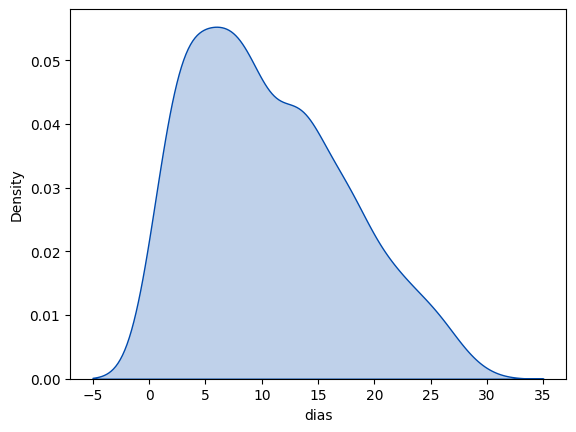

In [138]:
sns.kdeplot(
    data = df,
    x = 'dias',
    fill = True,
    color = mtk.palette[0]
)

In [145]:
df.select_dtypes('category').melt()

,variable,value
0,marketing_channel,Push
1,marketing_channel,Email
2,marketing_channel,Facebook
3,marketing_channel,House Ads
4,marketing_channel,Push
...,...,...
2629,subscribing_channel,House Ads
2630,subscribing_channel,House Ads
2631,subscribing_channel,Google
2632,subscribing_channel,Facebook


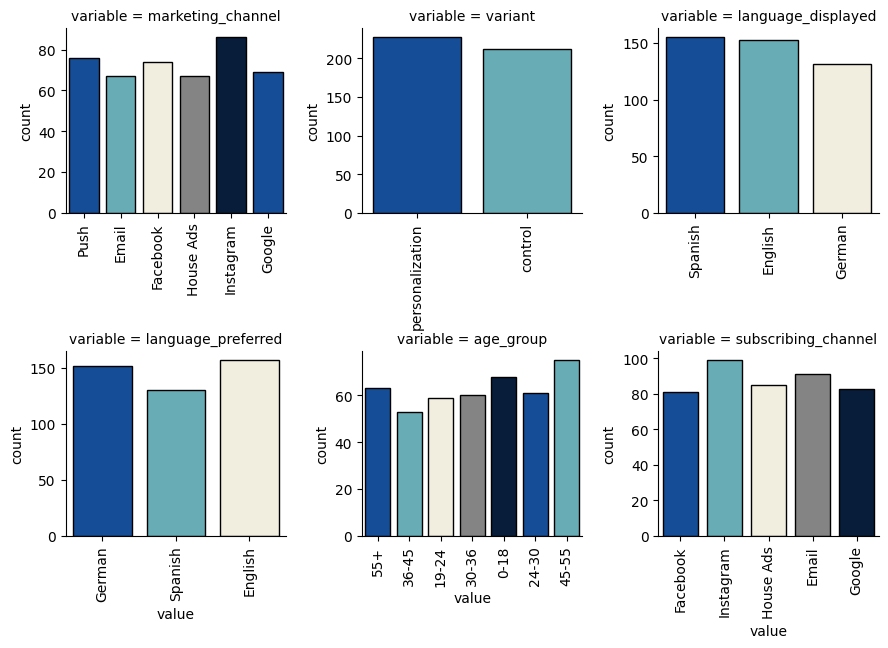

In [156]:
grid = sns.FacetGrid(df.select_dtypes('category').melt(),
                     col = 'variable',
                     sharex = False,
                     sharey = False,
                     col_wrap = 3)
grid.map(sns.countplot,'value',**mtk.kwargs)
grid.tick_params('x',rotation=90)
plt.subplots_adjust(hspace = .75)

## Probabilidades

In [164]:
#Cálculo de la probabilidad de retención de acuerdo al uso del lenguaje que ha marcado como preferido 
(
    df
    .groupby('uso_lenguaje_preferido')
    ['is_retained']
    .mean()
)

uso_lenguaje_preferido
False    0.307432
True     0.307692
Name: is_retained, dtype: float64

In [165]:
#Cálculo de la probabilidad de retención de acuerdo asi la suscripción se ha realizado por la misma plataforma que el marketing
(
    df
    .groupby('marketing_subs')
    ['is_retained']
    .mean()
)

marketing_subs
False    0.296830
True     0.347826
Name: is_retained, dtype: float64

**Si un usuario se suscribe por la misma plataforma por la que ha recibido la comunicación de marketing tiene mayores posibilidades de permanecer en la plataforma**

## Conversión

In [163]:
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,subscribing_channel,is_retained,tiempo_de_conversion,uso_lenguaje_preferido,dias,marketing_subs
3,a10000032,2018-01-17 16:59:39,Push,personalization,True,Spanish,German,55+,2018-01-22 10:54:34,Facebook,False,4 days 17:54:55,False,4,False
4,a10000033,2018-01-09 03:00:25,Email,personalization,True,Spanish,Spanish,36-45,2018-01-19 18:51:04,Instagram,True,10 days 15:50:39,True,10,False
5,a10000034,2018-01-03 22:11:23,Facebook,control,False,English,English,19-24,2018-01-16 05:06:18,Instagram,True,12 days 06:54:55,True,12,False
14,a10000043,2018-01-15 04:34:39,House Ads,personalization,True,English,German,30-36,2018-01-21 03:52:01,Facebook,False,5 days 23:17:22,False,5,False
16,a10000045,2018-01-07 09:54:55,Push,personalization,True,German,German,55+,2018-01-10 22:43:56,House Ads,True,3 days 12:49:01,True,3,False


In [168]:
crosstab = pd.crosstab(
    df['variant'],
    df['converted']
)

In [169]:
crosstab

converted,False,True
variant,,
control,123,89
personalization,83,144


In [171]:
chi2_contingency(crosstab).pvalue

1.0552814440944558e-05

Hay diferencias significativas entre la tasa de conversión del grupo control y el grupo prueba, por lo tanto, personalizar los correos aumenta las probabilidades de conversión

In [173]:
df.groupby('variant',as_index=False)['converted'].mean()

,variant,converted
0,control,0.419811
1,personalization,0.634361


In [182]:
df.groupby('variant',as_index=False)['converted'].count()

,variant,converted
0,control,212
1,personalization,227


<Axes: xlabel='variant', ylabel='converted'>

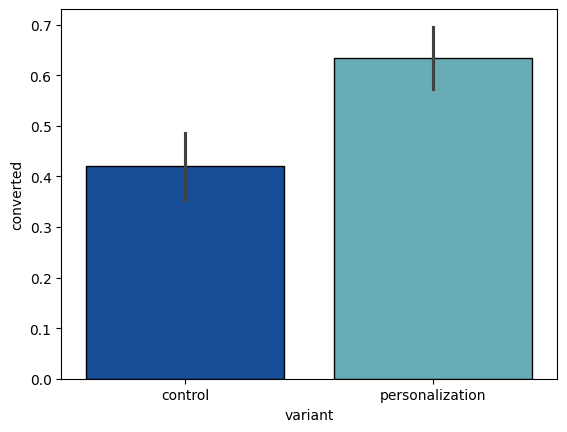

In [176]:
sns.barplot(
    data = df,
    x = 'variant',
    y = 'converted',
    estimator = 'mean',
    **mtk.kwargs
)